<a href="https://colab.research.google.com/github/lisafranchetti/JET/blob/main/flats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

Saving bristol_cleaned_flats.csv to bristol_cleaned_flats (1).csv


In [12]:
df = pd.read_csv('bristol_cleaned_flats.csv')
df.head()

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,185000.0,06/02/2015,BS3 3NQ,FLAT/MAISONETTE,SKYPARK ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,FEBRUARY,FRIDAY,NaN,False,4625.00,False
2,139950.0,15/12/2015,BS5 8AS,FLAT/MAISONETTE,BLACKSWARTH ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,DECEMBER,TUESDAY,NaN,False,3498.75,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.dropna(how='all')

In [14]:
df.head()

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier
1,185000.0,06/02/2015,BS3 3NQ,FLAT/MAISONETTE,SKYPARK ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,FEBRUARY,FRIDAY,NaN,False,4625.00,False
2,139950.0,15/12/2015,BS5 8AS,FLAT/MAISONETTE,BLACKSWARTH ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,DECEMBER,TUESDAY,NaN,False,3498.75,False
12,90000.0,07/01/2015,BS31 1SJ,FLAT/MAISONETTE,BATH ROAD,BRISTOL,BATH AND NORTH EAST SOMERSET,BATH AND NORTH EAST SOMERSET,A,2015.0,JANUARY,WEDNESDAY,NaN,False,2250.00,False
15,150000.0,06/02/2015,BS16 1PP,FLAT/MAISONETTE,MARLBOROUGH DRIVE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,2015.0,FEBRUARY,FRIDAY,NaN,False,3750.00,False
22,140000.0,29/05/2015,BS1 6DP,FLAT/MAISONETTE,VICTORIA STREET,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,B,2015.0,MAY,FRIDAY,NaN,False,3500.00,False


In [15]:
df.dtypes

,0
Price,float64
Date of Transfer,object
Postcode,object
Property Type,object
Street,object
Town/City,object
District,object
County,object
PPD Category Type,object
Year,float64


In [16]:

import re

def extract_postcode_area(postcode):
  match = re.match(r'^[A-Z]{1,2}\d{1,2}[A-Z]?', postcode.strip().upper())
  return match.group(0) if match else None

df['Postcode Area'] = df['Postcode'].astype(str).apply(extract_postcode_area)

In [17]:
df.head(5)

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier,Postcode Area
1,185000.0,06/02/2015,BS3 3NQ,FLAT/MAISONETTE,SKYPARK ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,FEBRUARY,FRIDAY,NaN,False,4625.00,False,BS3
2,139950.0,15/12/2015,BS5 8AS,FLAT/MAISONETTE,BLACKSWARTH ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,2015.0,DECEMBER,TUESDAY,NaN,False,3498.75,False,BS5
12,90000.0,07/01/2015,BS31 1SJ,FLAT/MAISONETTE,BATH ROAD,BRISTOL,BATH AND NORTH EAST SOMERSET,BATH AND NORTH EAST SOMERSET,A,2015.0,JANUARY,WEDNESDAY,NaN,False,2250.00,False,BS31
15,150000.0,06/02/2015,BS16 1PP,FLAT/MAISONETTE,MARLBOROUGH DRIVE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,2015.0,FEBRUARY,FRIDAY,NaN,False,3750.00,False,BS16
22,140000.0,29/05/2015,BS1 6DP,FLAT/MAISONETTE,VICTORIA STREET,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,B,2015.0,MAY,FRIDAY,NaN,False,3500.00,False,BS1


In [18]:
fm_df = df[['Price', 'Year', 'Postcode Area', 'Property Type']]
fm_df.head()

,Price,Year,Postcode Area,Property Type
1,185000.0,2015.0,BS3,FLAT/MAISONETTE
2,139950.0,2015.0,BS5,FLAT/MAISONETTE
12,90000.0,2015.0,BS31,FLAT/MAISONETTE
15,150000.0,2015.0,BS16,FLAT/MAISONETTE
22,140000.0,2015.0,BS1,FLAT/MAISONETTE


In [20]:
sales_volume = fm_df['Postcode Area'].value_counts()
print(sales_volume)

Postcode Area
BS16    15260
BS5      8659
BS3      8274
BS15     7746
BS4      7654
BS37     6730
BS20     6231
BS34     6199
BS7      6036
BS6      5345
BS8      4832
BS9      4603
BS31     4599
BS14     4354
BS30     4258
BS35     4035
BS13     3782
BS10     3700
BS48     3677
BS32     3583
BS1      3562
BS2      2895
BS39     2412
BS11     2388
BS36     2163
BS49     2124
BS40     1864
BS41      919
BS12        1
Name: count, dtype: int64


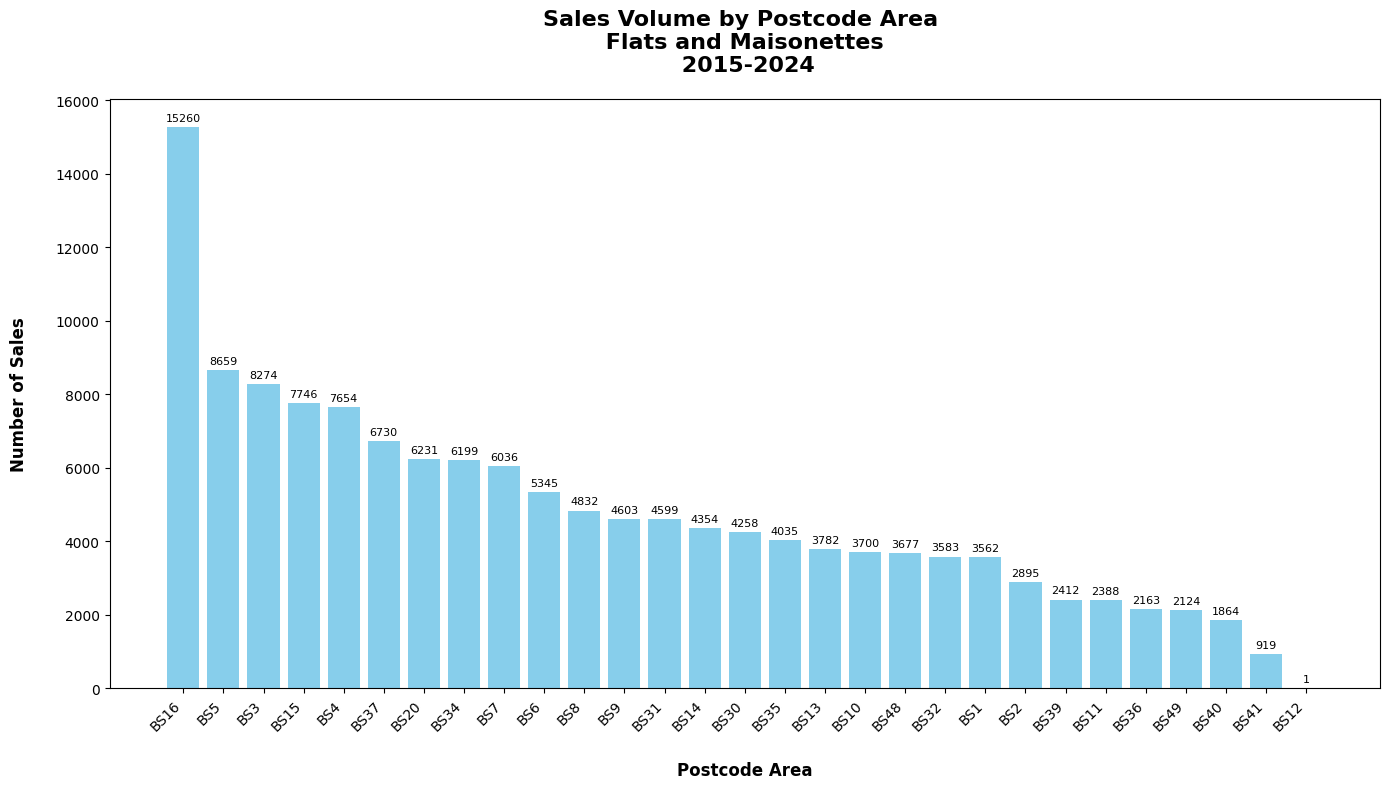

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(sales_volume.index, sales_volume.values, color='skyblue')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Set title and labels using ax methods
ax.set_title('Sales Volume by Postcode Area \n Flats and Maisonettes \n 2015-2024', fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('Postcode Area', fontweight='bold', fontsize=12, labelpad=20)
ax.set_ylabel('Number of Sales', fontweight='bold', fontsize=12, labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [25]:

# Group by postcode and calculate sales count and total price
summary = df.groupby('Postcode Area').agg(
  Sales_Count=('Price', 'count'),
  Total_Price=('Price', 'sum')
).reset_index()

# Display the result
print(summary)



   Postcode Area  Sales_Count   Total_Price
0            BS1         3562  1.113606e+09
1           BS10         3700  1.047513e+09
2           BS11         2388  5.732791e+08
3           BS12            1  3.750000e+05
4           BS13         3782  9.131737e+08
5           BS14         4354  1.156435e+09
6           BS15         7746  1.990446e+09
7           BS16        15260  4.666247e+09
8            BS2         2895  7.994799e+08
9           BS20         6231  2.275580e+09
10           BS3         8274  2.668323e+09
11          BS30         4258  1.326728e+09
12          BS31         4599  1.678470e+09
13          BS32         3583  1.146663e+09
14          BS34         6199  1.754563e+09
15          BS35         4035  1.441626e+09
16          BS36         2163  8.680356e+08
17          BS37         6730  1.984103e+09
18          BS39         2412  7.880042e+08
19           BS4         7654  2.152920e+09
20          BS40         1864  9.128555e+08
21          BS41          919  4

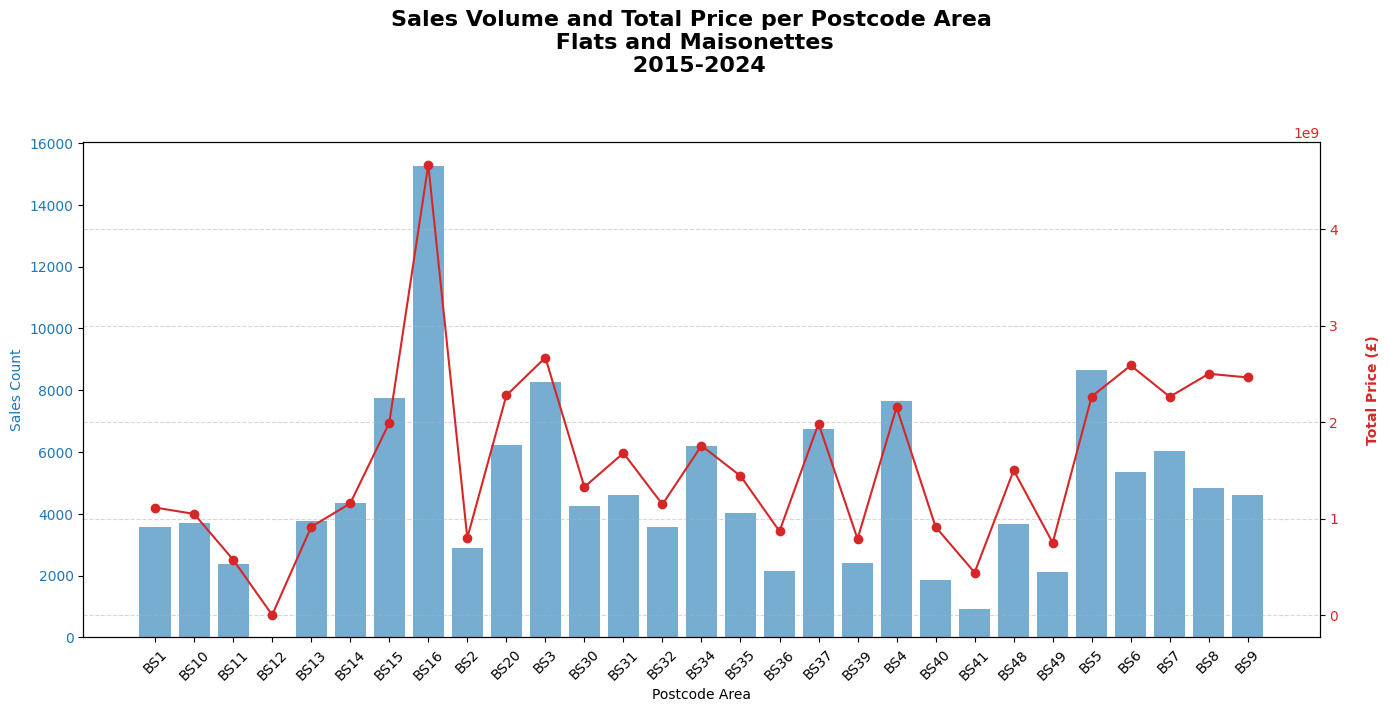

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [3562, 3700, 2388, 1, 3782, 4354, 7746, 15260, 2895, 6231,
                    8274, 4258, 4599, 3583, 6199, 4035, 2163, 6730, 2412, 7654,
                    1864, 919, 3677, 2124, 8659, 5345, 6036, 4832, 4603],
    'Total_Price': [1.113606e9, 1.047513e9, 5.732791e8, 3.75e5, 9.131737e8, 1.156435e9, 1.990446e9, 4.666247e9, 7.994799e8, 2.275580e9,
                    2.668323e9, 1.326728e9, 1.678470e9, 1.146663e9, 1.754563e9, 1.441626e9, 8.680356e8, 1.984103e9, 7.880042e8, 2.152920e9,
                    9.128555e8, 4.398763e8, 1.499612e9, 7.483385e8, 2.264608e9, 2.586297e9, 2.261873e9, 2.500359e9, 2.461835e9]
}

df = pd.DataFrame(data)

# Create a bar chart with dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Sales Count
color = 'tab:blue'
ax1.set_xlabel('Postcode Area')
ax1.set_ylabel('Sales Count', color=color)
ax1.bar(df['Postcode Area'], df['Sales_Count'], color=color, alpha=0.6, label='Sales Count')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Total Price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Price (£)', color=color, fontweight='bold', labelpad=20)
ax2.plot(df['Postcode Area'], df['Total_Price'], color=color, marker='o', label='Total Price')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
fig.suptitle('Sales Volume and Total Price per Postcode Area \n Flats and Maisonettes \n 2015-2024', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()



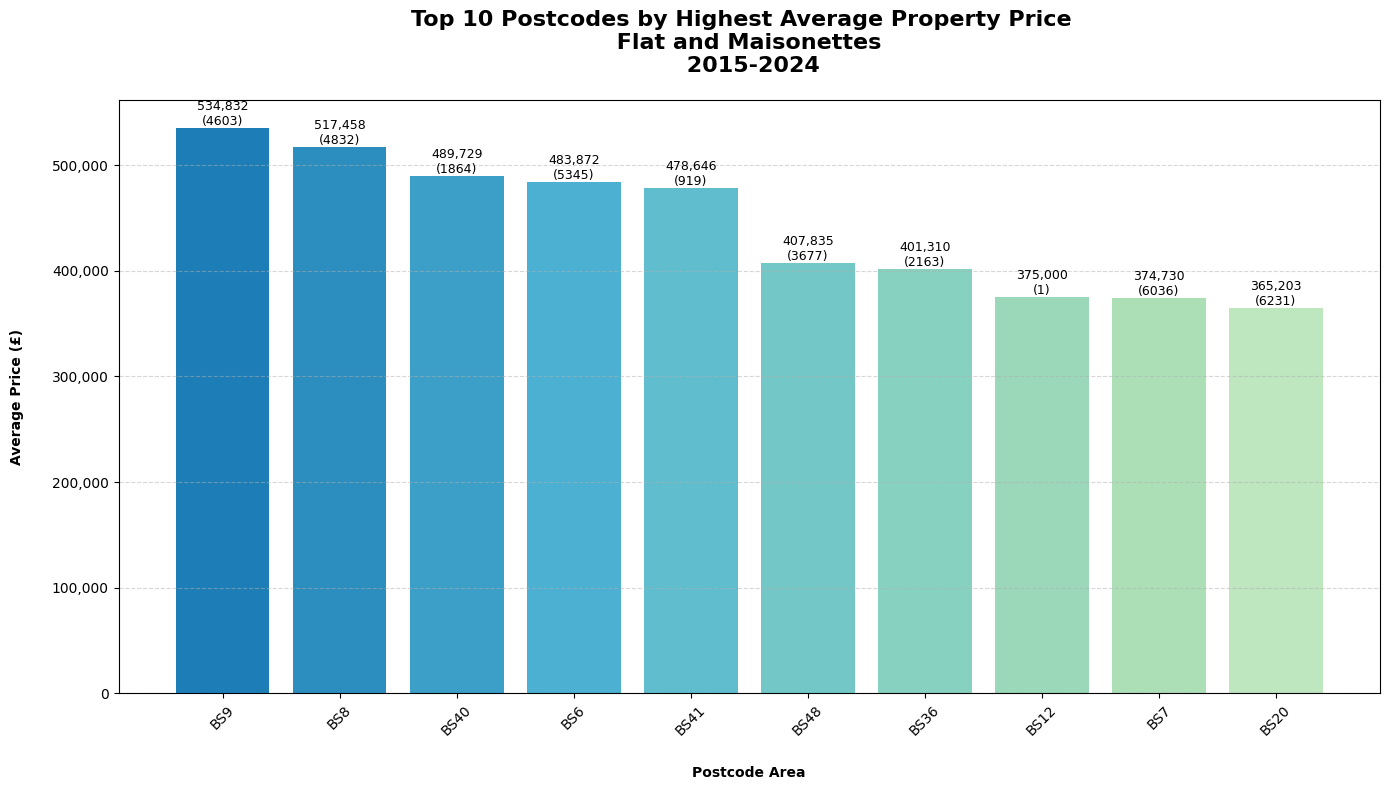

In [31]:
import matplotlib.ticker as ticker
# Create the DataFrame from the provided data
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [3562, 3700, 2388, 1, 3782, 4354, 7746, 15260, 2895, 6231,
                    8274, 4258, 4599, 3583, 6199, 4035, 2163, 6730, 2412, 7654,
                    1864, 919, 3677, 2124, 8659, 5345, 6036, 4832, 4603],
    'Total_Price': [1.113606e9, 1.047513e9, 5.732791e8, 3.75e5, 9.131737e8, 1.156435e9, 1.990446e9, 4.666247e9, 7.994799e8, 2.275580e9,
                    2.668323e9, 1.326728e9, 1.678470e9, 1.146663e9, 1.754563e9, 1.441626e9, 8.680356e8, 1.984103e9, 7.880042e8, 2.152920e9,
                    9.128555e8, 4.398763e8, 1.499612e9, 7.483385e8, 2.264608e9, 2.586297e9, 2.261873e9, 2.500359e9, 2.461835e9]}# Create DataFrame
df = pd.DataFrame(data)

# Calculate average price
df['Average_Price'] = df['Total_Price'] / df['Sales_Count']

# Get top 10 postcodes by highest average price
top_avg_price_df = df.sort_values(by='Average_Price', ascending=False).head(10)

# Teal gradient colors
colors = plt.cm.GnBu(np.linspace(0.8, 0.3, len(top_avg_price_df)))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_avg_price_df['Postcode Area'], top_avg_price_df['Average_Price'], color=colors)

# Annotate bars
for bar, avg_price, count in zip(bars, top_avg_price_df['Average_Price'], top_avg_price_df['Sales_Count']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(avg_price):,}\n({count})",
            ha='center', va='bottom', fontsize=9)

# Titles and labels
ax.set_title('Top 10 Postcodes by Highest Average Property Price  \n Flat and Maisonettes \n 2015-2024', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Average Price (£)', fontweight='bold', labelpad=20)
ax.set_xlabel('Postcode Area', fontweight='bold', labelpad=20)
ax.set_xticks(range(len(top_avg_price_df)))
ax.set_xticklabels(top_avg_price_df['Postcode Area'], rotation=45)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Create the DataFrame from the provided data
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [3562, 3700, 2388, 1, 3782, 4354, 7746, 15260, 2895, 6231,
                    8274, 4258, 4599, 3583, 6199, 4035, 2163, 6730, 2412, 7654,
                    1864, 919, 3677, 2124, 8659, 5345, 6036, 4832, 4603],
    'Total_Price': [1.113606e9, 1.047513e9, 5.732791e8, 3.75e5, 9.131737e8, 1.156435e9, 1.990446e9, 4.666247e9, 7.994799e8, 2.275580e9,
                    2.668323e9, 1.326728e9, 1.678470e9, 1.146663e9, 1.754563e9, 1.441626e9, 8.680356e8, 1.984103e9, 7.880042e8, 2.152920e9,
                    9.128555e8, 4.398763e8, 1.499612e9, 7.483385e8, 2.264608e9, 2.586297e9, 2.261873e9, 2.500359e9, 2.461835e9]
}

